In [1]:
%pip install pydot

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.california_housing.load_data()

In [5]:
# create 5 layers
normalization_layer = keras.layers.Normalization()
hidden_layer1 = keras.layers.Dense(30, activation='relu')
hidden_layer2 = keras.layers.Dense(30, activation='relu')
concat_layer = keras.layers.Concatenate()
output_layer = keras.layers.Dense(1)

In [6]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

In [6]:
model = keras.models.Model(inputs=[input_], outputs=[output])

In [7]:
normalization_layer.adapt(X_train)

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

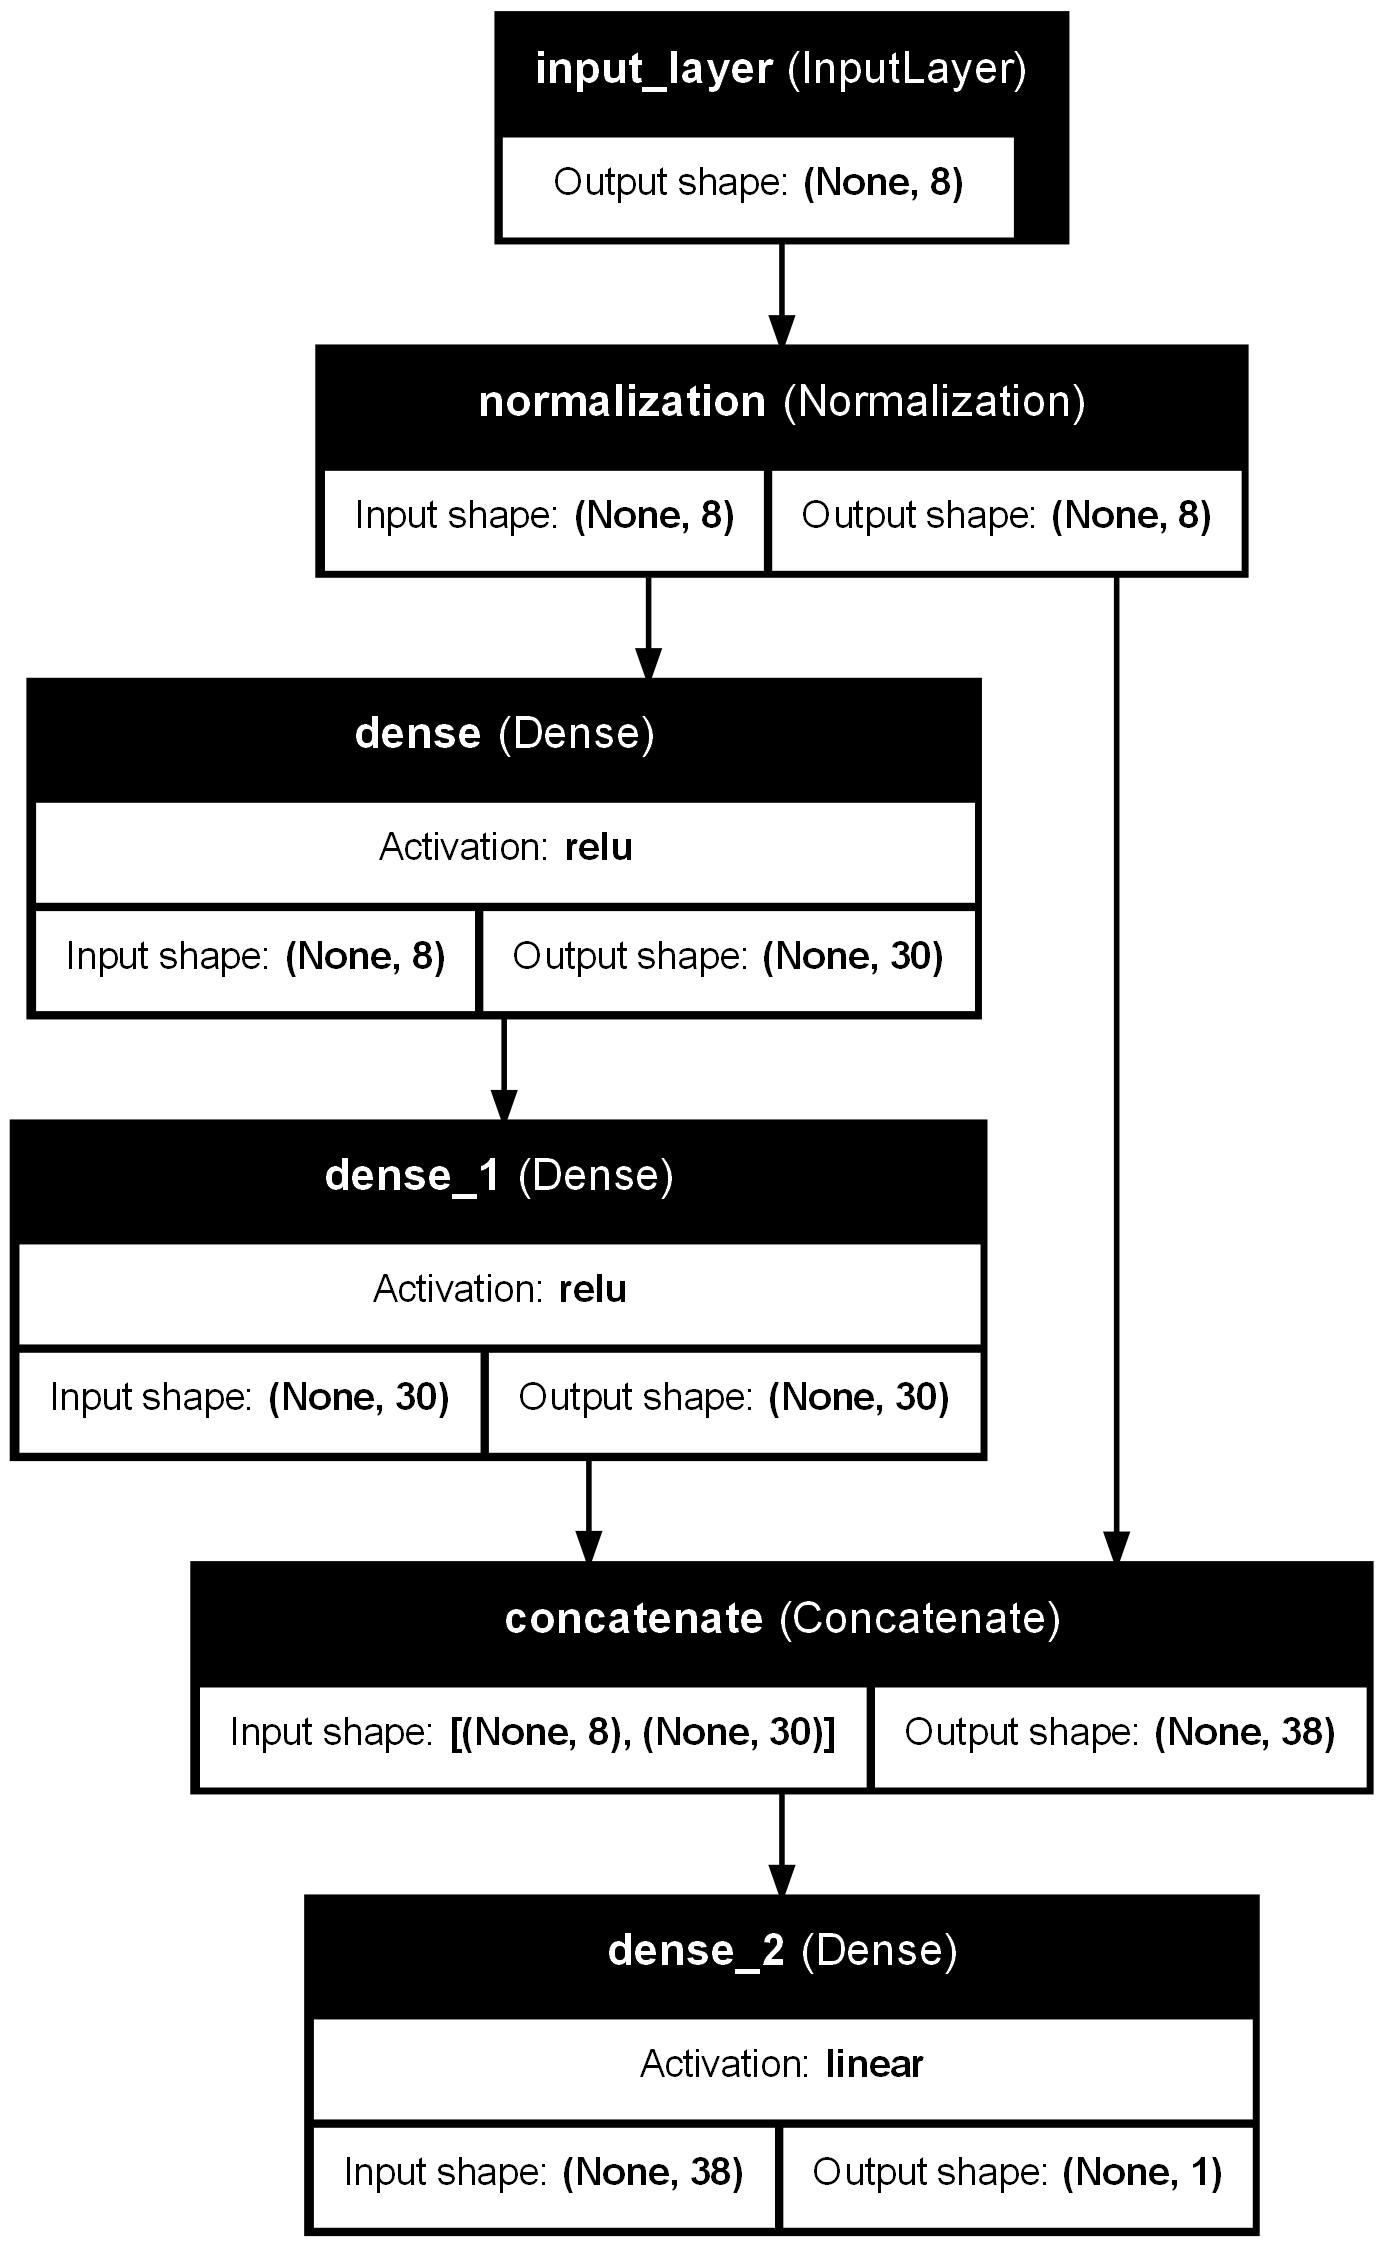

In [9]:
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, show_layer_names=True, to_file="model.png")

In [10]:
model.compile(optimizer="Adam", loss="mse", metrics=[keras.metrics.RootMeanSquaredError])

In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_split=.2)

Epoch 1/10


C:\Users\Mohit\anaconda3\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 56773451776.0000 - root_mean_squared_error: 238248.2969 - val_loss: 56455880704.0000 - val_root_mean_squared_error: 237604.4688
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55829762048.0000 - root_mean_squared_error: 236277.8281 - val_loss: 54674096128.0000 - val_root_mean_squared_error: 233824.9219
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53653413888.0000 - root_mean_squared_error: 231609.9844 - val_loss: 50480164864.0000 - val_root_mean_squared_error: 224677.9062
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48330973184.0000 - root_mean_squared_error: 219818.2344 - val_loss: 43918295040.0000 - val_root_mean_squared_error: 209566.9219
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 41519063040.0000 - root_mean_squared_error: 203724.9688 - val_loss: 35977494528.0000 - val_root_mean_squared_error: 189677.3438
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33175543808

In [12]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

In [13]:
import matplotlib.pyplot as plt

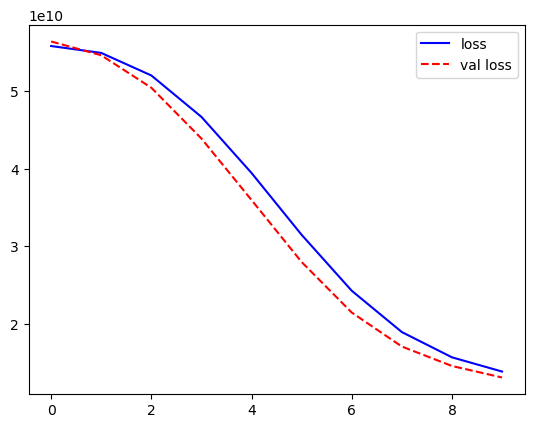

In [14]:
plt.plot(history.history["loss"], 'b-', label='loss')
plt.plot(history.history["val_loss"], 'r--', label='val loss')
plt.legend()
plt.show()

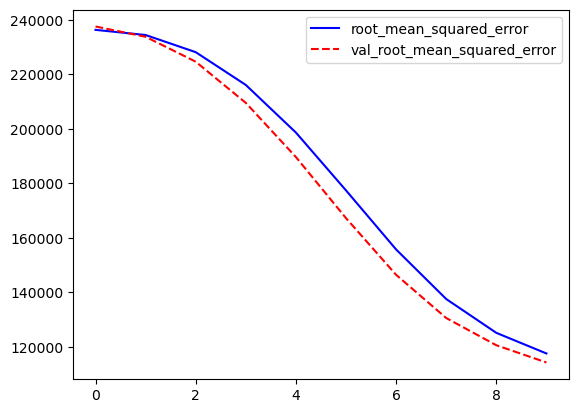

In [15]:
plt.plot(history.history["root_mean_squared_error"], 'b-', label='root_mean_squared_error')
plt.plot(history.history["val_root_mean_squared_error"], 'r--', label='val_root_mean_squared_error')
plt.legend()
plt.show()

In [16]:
model.evaluate(X_train, y_train)

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13410182144.0000 - root_mean_squared_error: 115783.8203  


[13155346432.0, 114696.7578125]